**To dos**:
- Add boxplots(Teresa)
- Add corr matrix (Carlos)
- Check MICE imputation (Hossein)
- Pipelines from deployment class (Carlos)
- confission matrix with heat map (Hossein)
- bayessian optimization for hyperparm tuning (Hossein)
- explain the feature importance part (Mandana explain how to interpret).Hossein will research on bar plots for the feature importance. (Hossein will do research on this first)

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dermatology = fetch_ucirepo(id=33)

# data (as pandas dataframes)
X = dermatology.data.features
y = dermatology.data.targets

# metadata
print(dermatology.metadata)

# variable information
print(dermatology.variables)


{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'ID': 387, 'type': 'NATIVE', 'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'venue': 'Artif. Intell. Medicine', 'year': 1998, 'journal': No

In [10]:
X[X['age'].isnull()]

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
36,2,1,2,3,2,3,0,2,0,0,...,1,0,2,0,2,0,0,0,3,NaN
262,2,1,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN
263,1,1,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,NaN
264,1,1,0,2,0,0,0,0,1,0,...,0,0,0,2,0,0,0,3,0,NaN
265,1,1,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN


In [4]:
#EDA
# Convert y to a Series
y = y.iloc[:, 0]  # Select the first column if y is a DataFrame

# Check the target values
print("\nUnique class labels:", y.unique())


Unique class labels: [2 1 3 5 4 6]


In [5]:
# Check for missing values
print("\nMissing values in features:\n", X.isnull().sum())
print("\nMissing values in target:\n", y.isnull().sum())


Missing values in features:
 erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges            

Age has a few null values

In [6]:
# Display basic statistics of the dataset
print("\nDataset Summary:\n", X.describe())


Dataset Summary:
          erythema     scaling  definite-borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner phenomenon  polygonal papules  follicular papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%  

In [7]:


# Fill missing age values with the median
X["age"].fillna(X["age"].median(), inplace=True)

# Confirm no missing values remain
print("\nMissing values after imputation:\n", X.isnull().sum().sum())



Missing values after imputation:
 0


<ipython-input-7-874437230648>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["age"].fillna(X["age"].median(), inplace=True)
<ipython-input-7-874437230648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age"].fillna(X["age"].median(), inplace=True)


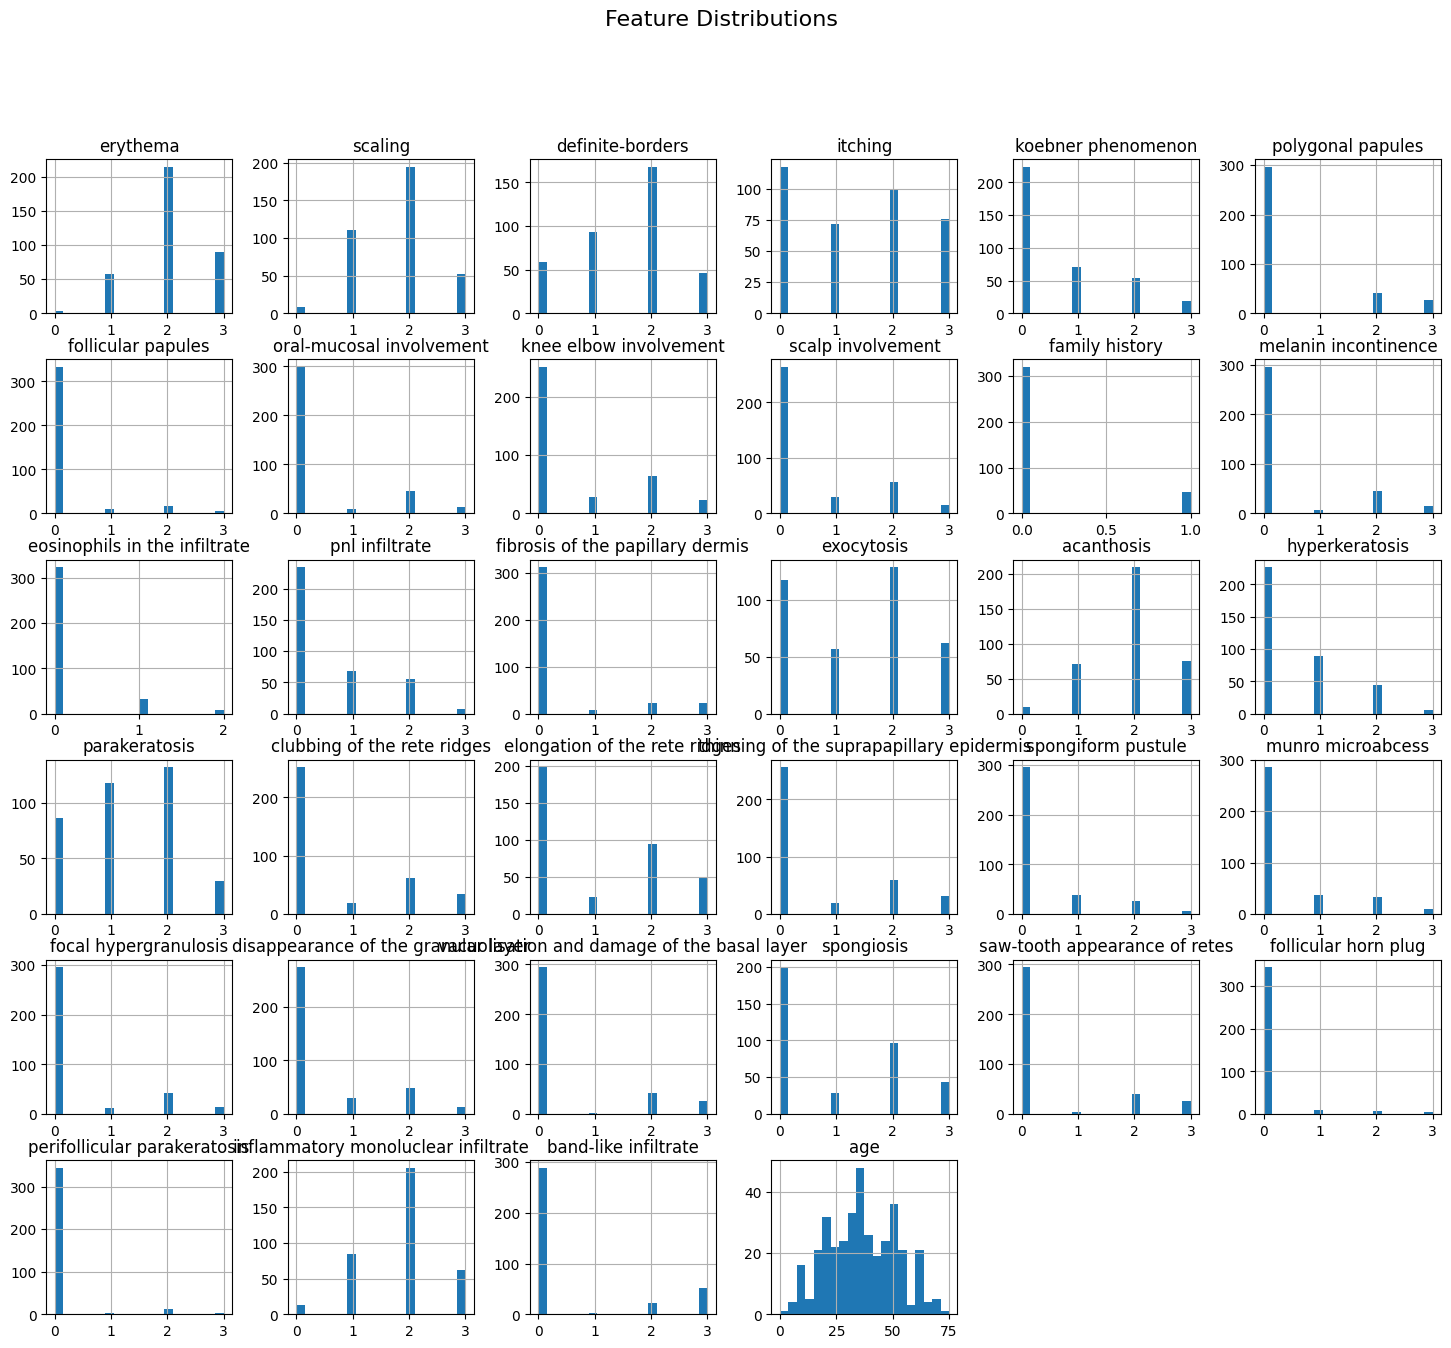

In [8]:
import matplotlib.pyplot as plt

# Plot histograms of all features
X.hist(figsize=(18, 15), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


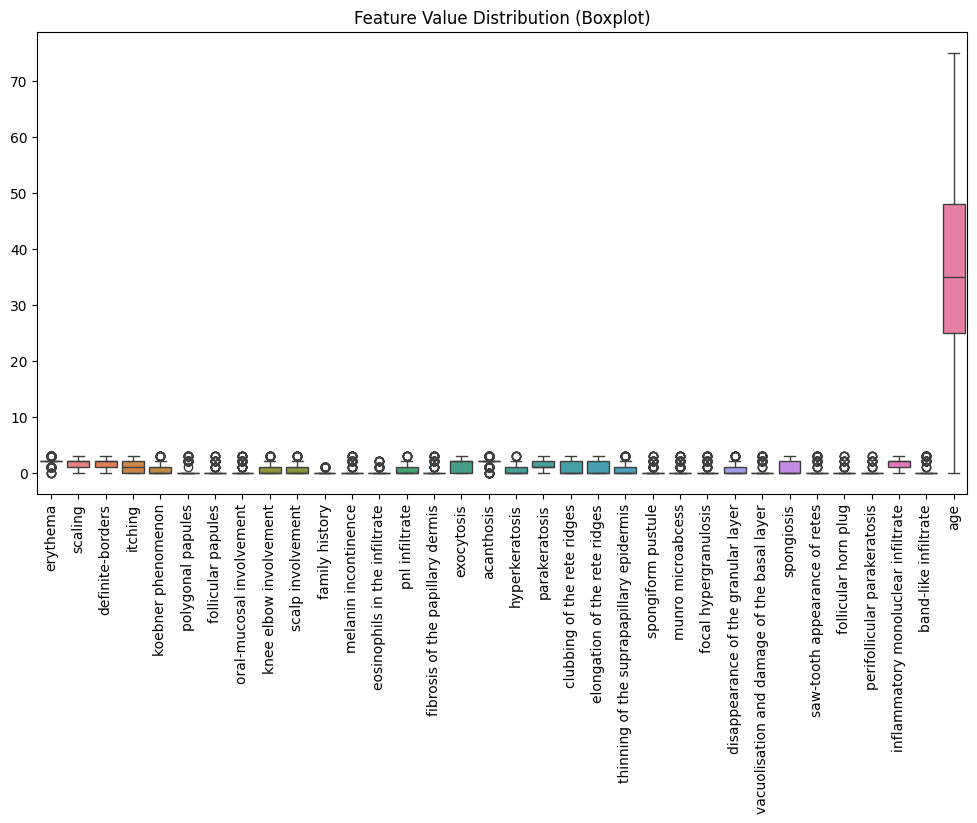

In [9]:
import seaborn as sns

# Plot a boxplot for all features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.title("Feature Value Distribution (Boxplot)")
plt.show()


In [10]:
#Splitting the set
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (292, 34)
Testing set shape: (74, 34)


In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier readability (optional)
import pandas as pd
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display first few rows of scaled data
print(X_train_scaled_df.head())



   erythema   scaling  definite-borders   itching  koebner phenomenon  \
0 -0.074662  1.682317          0.472404  1.430488            2.640559   
1 -0.074662  0.282783         -0.622374  1.430488           -0.692481   
2 -0.074662  0.282783          0.472404 -1.230037            1.529546   
3 -0.074662  0.282783         -0.622374 -1.230037            0.418532   
4 -1.528082 -1.116752         -0.622374 -1.230037            0.418532   

   polygonal papules  follicular papules  oral-mucosal involvement  \
0           1.648973           -0.291486                  1.924817   
1          -0.462870           -0.291486                 -0.451701   
2          -0.462870           -0.291486                 -0.451701   
3          -0.462870           -0.291486                 -0.451701   
4          -0.462870           -0.291486                 -0.451701   

   knee elbow involvement  scalp involvement  ...  focal hypergranulosis  \
0               -0.628391          -0.574871  ...               

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train (fit) the model on the scaled training data
model.fit(X_train_scaled, y_train)

print("Model training complete!")


Model training complete!


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Multi-class precision
recall = recall_score(y_test, y_pred, average='weighted')  # Multi-class recall
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9595
Precision: 0.9607
Recall: 0.9595

Confusion Matrix:
[[23  0  0  0  0  0]
 [ 0 10  0  2  0  0]
 [ 0  0 15  0  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  4]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



In [14]:
#Hyperparam tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in each leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9828170660432496


In [15]:
#Training with the optimized params
# Train the optimized Random Forest model
optimized_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

optimized_model.fit(X_train_scaled, y_train)

# Make predictions with the optimized model
y_pred_optimized = optimized_model.predict(X_test_scaled)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized, average='weighted')
recall = recall_score(y_test, y_pred_optimized, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

# Print results
print(f"Optimized Accuracy: {accuracy:.4f}")
print(f"Optimized Precision: {precision:.4f}")
print(f"Optimized Recall: {recall:.4f}")

# Display confusion matrix
print("\nOptimized Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Optimized Accuracy: 0.9595
Optimized Precision: 0.9607
Optimized Recall: 0.9595

Optimized Confusion Matrix:
[[23  0  0  0  0  0]
 [ 0 10  0  2  0  0]
 [ 0  0 15  0  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  4]]

Optimized Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



What questions can we answer with this dataset tha would be beneficial.
What


In [16]:
#Save the Model and Scaler for Deployment
import joblib

# Save the trained model
joblib.dump(optimized_model, "dermatology_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


Feature importance analysis for each class label using SHAP technique

In [25]:
# Print the shapes of SHAP values and X_test_scaled
print("SHAP values shape:", np.array(shap_values).shape)
print("X_test_scaled shape:", X_test_scaled.shape)


SHAP values shape: (50, 34, 6)
X_test_scaled shape: (74, 34)


  0%|          | 0/50 [00:00<?, ?it/s]

Corrected SHAP values shape: (6, 50, 34)

Feature importance for Class 1:


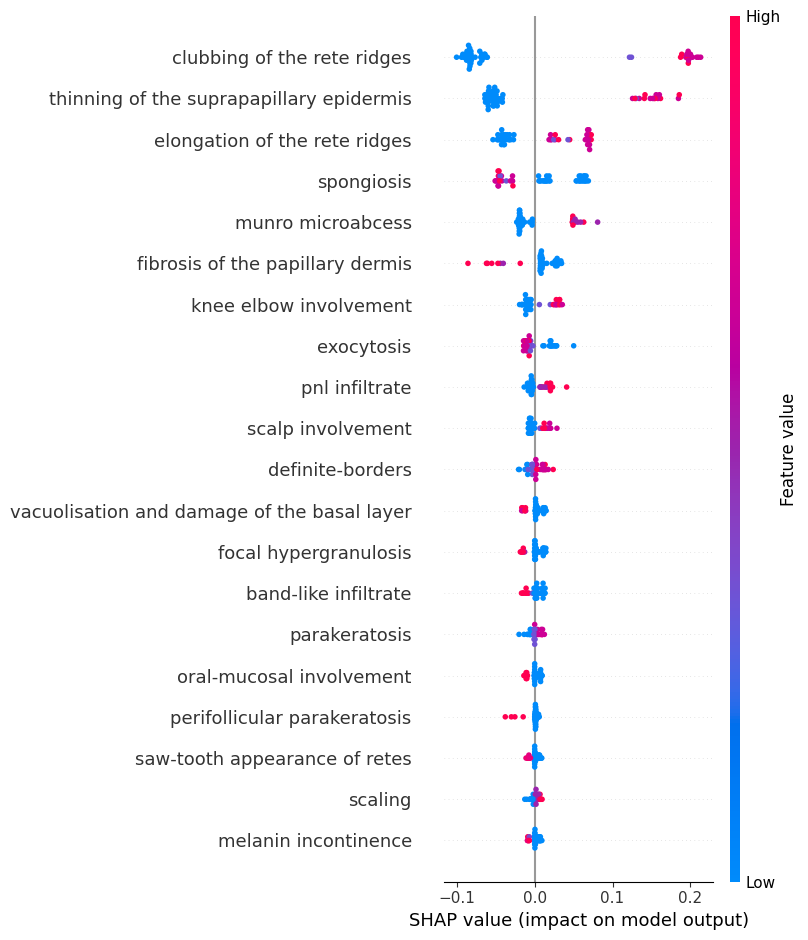


Feature importance for Class 2:


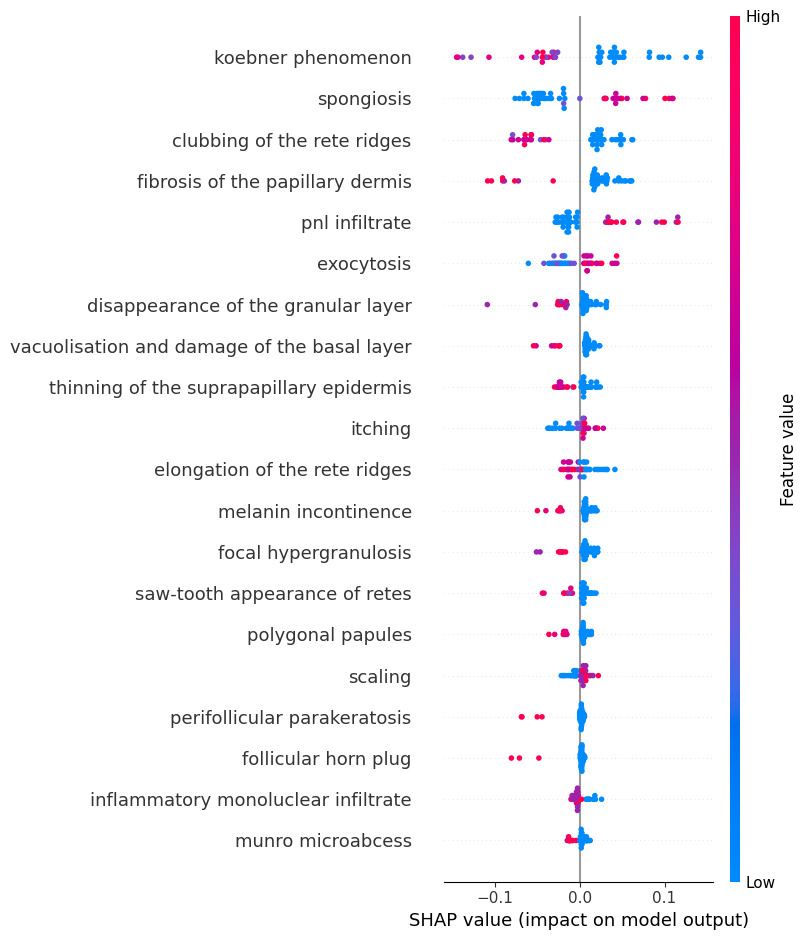


Feature importance for Class 3:


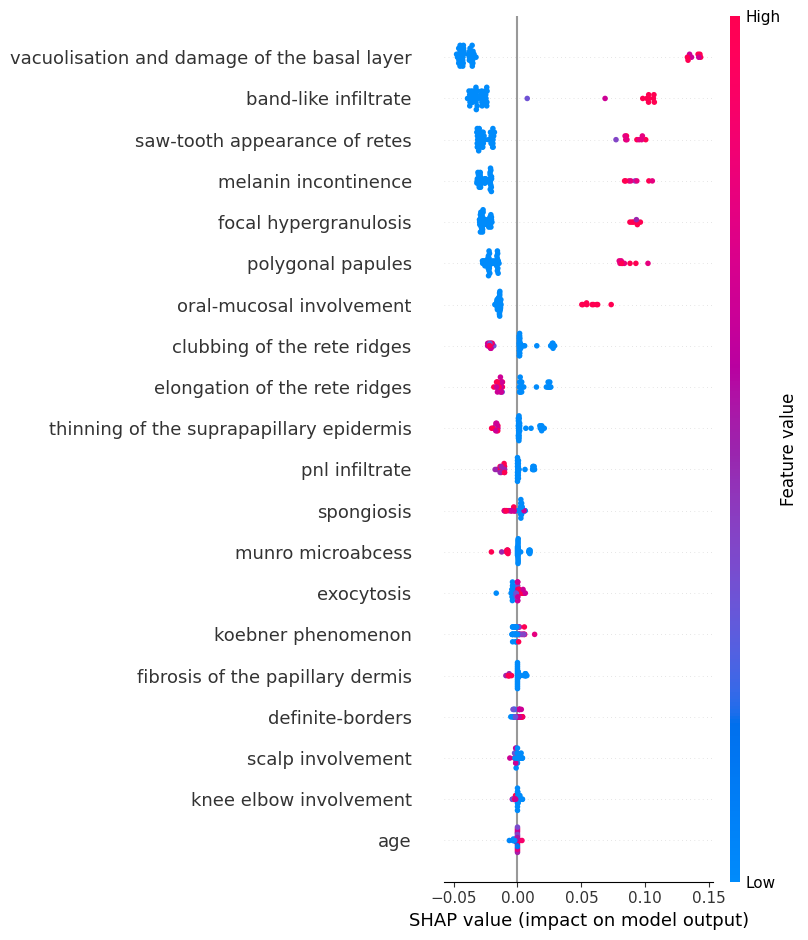


Feature importance for Class 4:


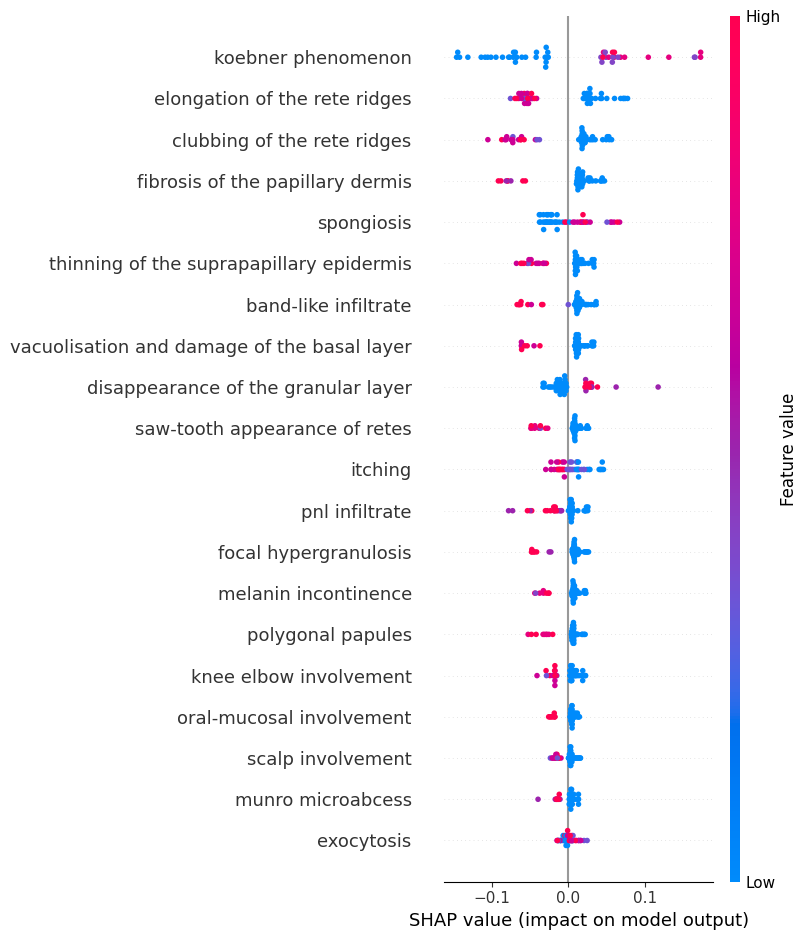


Feature importance for Class 5:


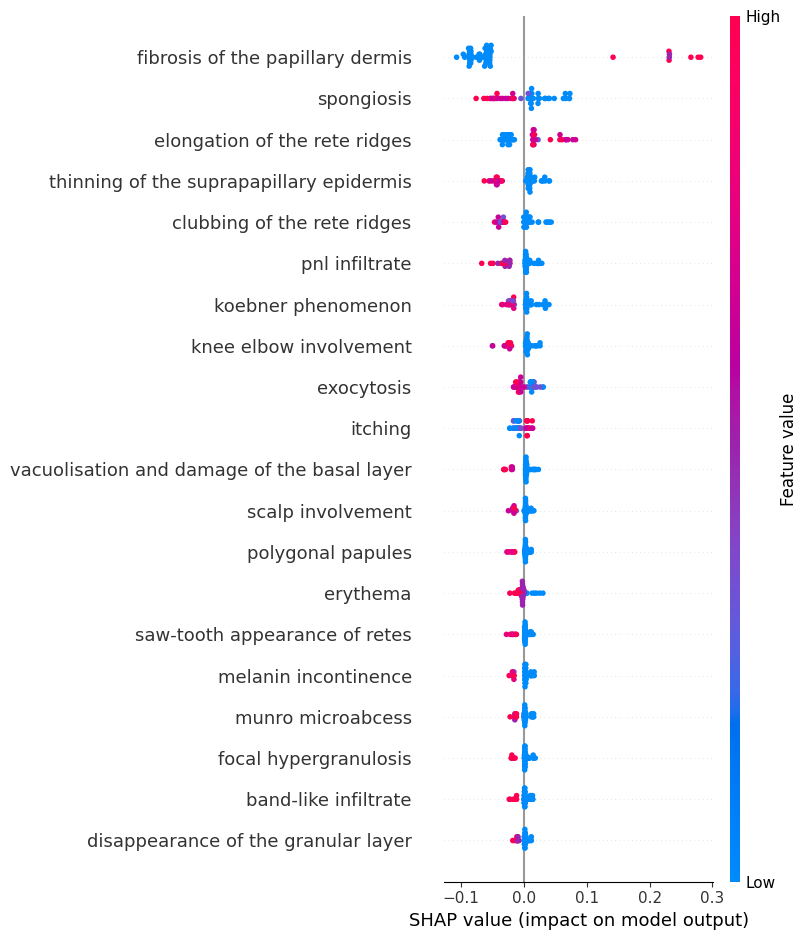


Feature importance for Class 6:


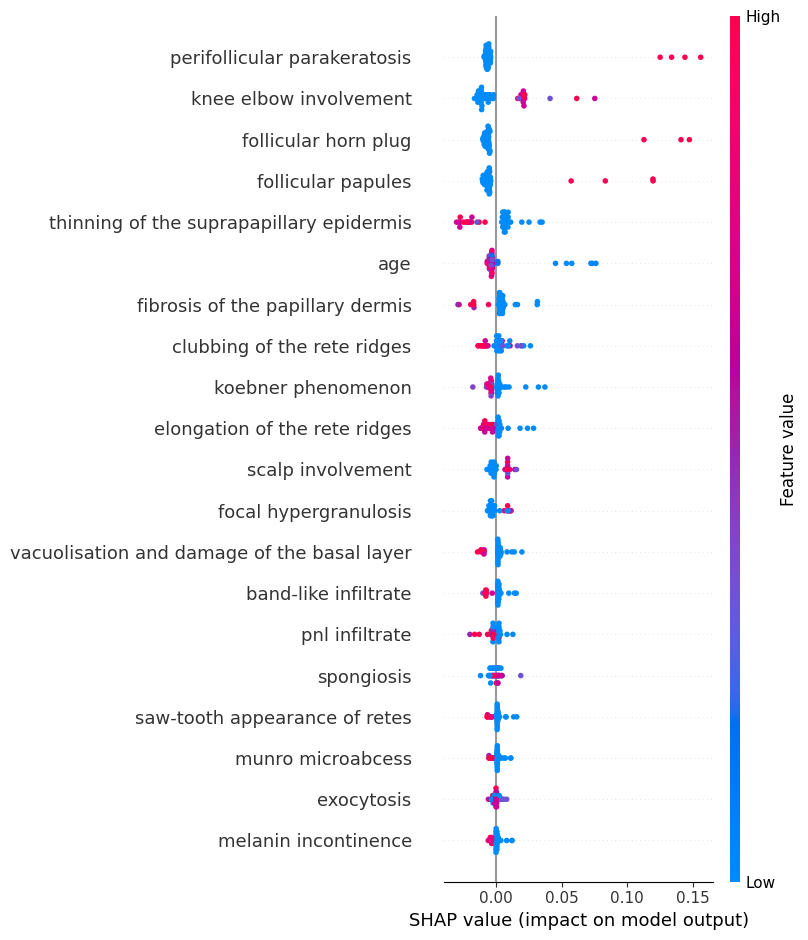

In [26]:
import shap
import numpy as np

# Use KernelExplainer for multi-class models
explainer = shap.KernelExplainer(optimized_model.predict_proba, X_train_scaled[:50])

# Compute SHAP values
shap_values = explainer.shap_values(X_test_scaled[:50])

# Convert SHAP values to the correct shape: (classes, samples, features)
shap_values_corrected = np.transpose(shap_values, (2, 0, 1))  # Rearrange axes

# Verify new SHAP values shape
print("Corrected SHAP values shape:", np.array(shap_values_corrected).shape)  # Should be (6, 50, 34)

# Plot SHAP summary per class
for class_idx in range(shap_values_corrected.shape[0]):  # Loop through each class
    print(f"\nFeature importance for Class {class_idx + 1}:")
    shap.summary_plot(shap_values_corrected[class_idx], features=X_test_scaled[:50], feature_names=X.columns)


Here should be an explanation on how to interpret the resulsts:

Now I will test if the scaler and the model works when I pass inputs

In [41]:
import joblib

# Load the trained model
loaded_model = joblib.load("dermatology_model.pkl")

# Load the scaler
loaded_scaler = joblib.load("scaler.pkl")

print("Model and scaler loaded successfully!")


Model and scaler loaded successfully!


In [53]:

# Ensure input has all 34 features (Replace with actual patient data)
# Ensure input has all 34 features (Modify values as needed)
new_patient = pd.DataFrame([[
    2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1,
    1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 55  # Added missing feature
]], columns=X.columns)  # Use correct feature names

# Verify input shape
print(f"New patient data shape: {new_patient.shape}")  # Should be (1, 34)

# Scale the new input using the loaded scaler
new_patient_scaled = loaded_scaler.transform(new_patient)

# Make a prediction
prediction = loaded_model.predict(new_patient_scaled)

# Print the result
print(f"Predicted Disease Class: {prediction[0]}")




New patient data shape: (1, 34)
Predicted Disease Class: 1


In [66]:
#Here I want to know the unique vals from each col
print("Unique values from each feature")

for col in X.columns:
  print(f"{col}: {X[col].unique()}")

Unique values from each feature
erythema: [2 3 1 0]
scaling: [2 3 1 0]
definite-borders: [0 3 2 1]
itching: [3 2 0 1]
koebner phenomenon: [0 1 2 3]
polygonal papules: [0 3 2 1]
follicular papules: [0 3 1 2]
oral-mucosal involvement: [0 3 2 1]
knee elbow involvement: [1 0 3 2]
scalp involvement: [0 1 2 3]
family history: [0 1]
melanin incontinence: [0 1 2 3]
eosinophils in the infiltrate: [0 2 1]
pnl infiltrate: [0 1 3 2]
fibrosis of the papillary dermis: [0 3 1 2]
exocytosis: [3 1 0 2]
acanthosis: [2 3 1 0]
hyperkeratosis: [0 2 1 3]
parakeratosis: [0 2 3 1]
clubbing of the rete ridges: [0 2 1 3]
elongation of the rete ridges: [0 2 3 1]
thinning of the suprapapillary epidermis: [0 2 3 1]
spongiform pustule: [0 2 1 3]
munro microabcess: [0 1 2 3]
focal hypergranulosis: [0 2 3 1]
disappearance of the granular layer: [0 3 2 1]
vacuolisation and damage of the basal layer: [0 2 3 1]
spongiosis: [3 0 2 1]
saw-tooth appearance of retes: [0 2 3 1]
follicular horn plug: [0 1 2 3]
perifollicular 